🚀 STARTING HOLOGRAPHIC QUTRIT ENCODING TESTS
🌟 HOLOGRAPHIC QUTRIT ENCODING TEST

📊 Testing pattern: interference
------------------------------
   🔧 Damage level: 10.0%
      Quantum Fidelity: 0.962
      Classical Fidelity: 0.972
      Quantum Advantage: 0.99x
   🔧 Damage level: 30.0%
      Quantum Fidelity: 0.962
      Classical Fidelity: 0.971
      Quantum Advantage: 0.99x
   🔧 Damage level: 50.0%
      Quantum Fidelity: 0.962
      Classical Fidelity: 0.962
      Quantum Advantage: 1.00x
   🔧 Damage level: 70.0%
      Quantum Fidelity: 0.962
      Classical Fidelity: 0.943
      Quantum Advantage: 1.02x

📊 Testing pattern: hologram
------------------------------
   🔧 Damage level: 10.0%
      Quantum Fidelity: 0.941
      Classical Fidelity: 0.976
      Quantum Advantage: 0.96x
   🔧 Damage level: 30.0%
      Quantum Fidelity: 0.941
      Classical Fidelity: 0.976
      Quantum Advantage: 0.96x
   🔧 Damage level: 50.0%
      Quantum Fidelity: 0.941
      Classical Fidelity: 0.946
 

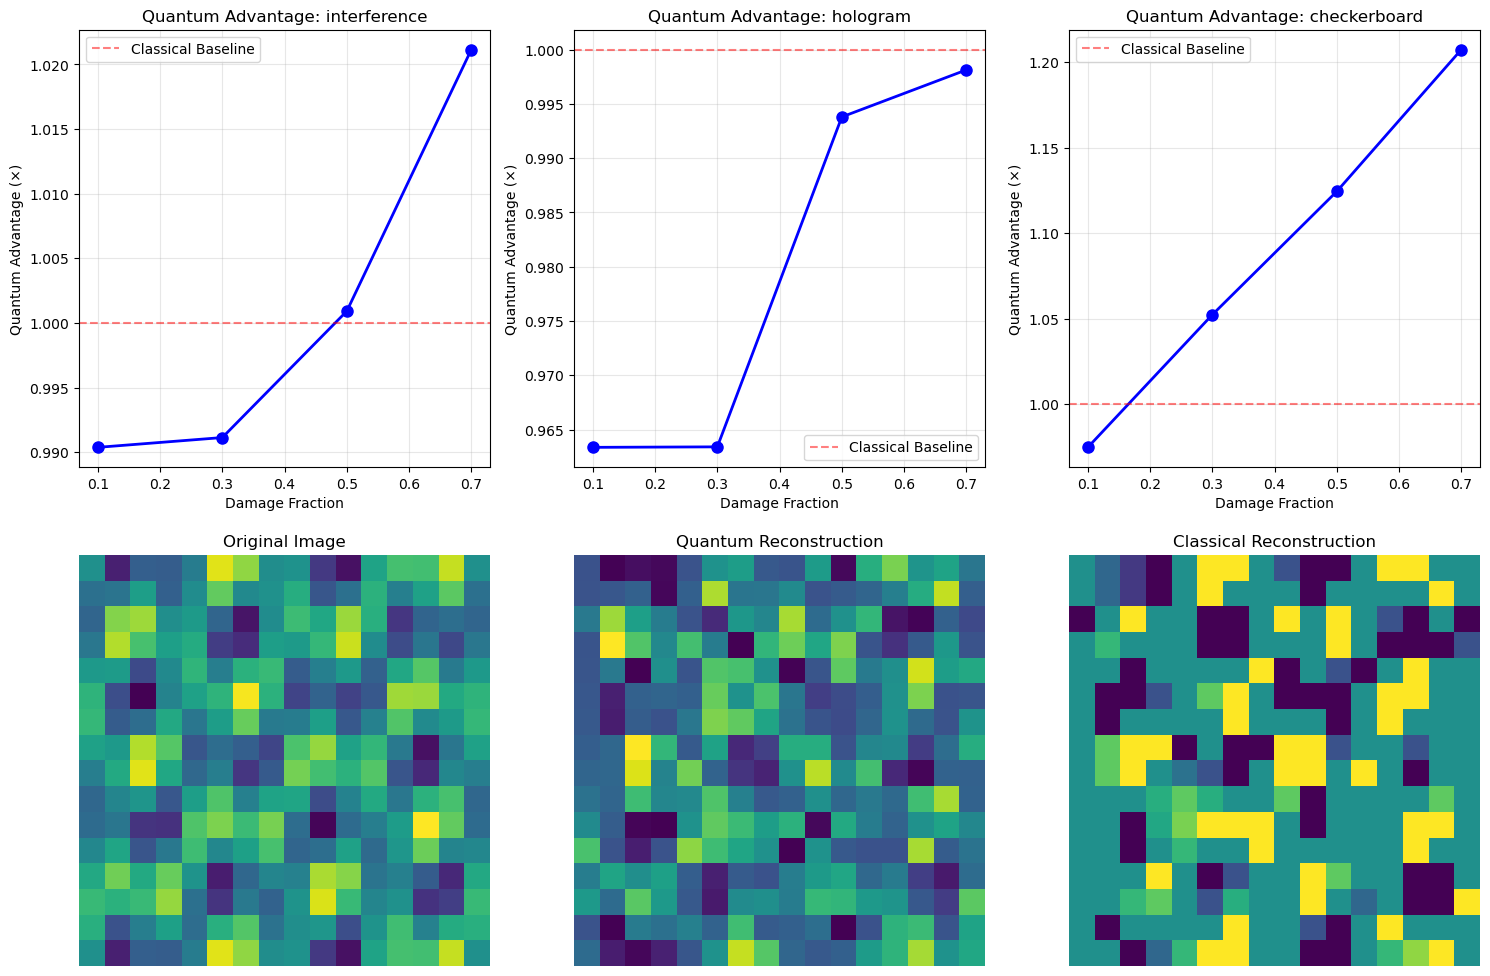

In [1]:
#!/usr/bin/env python3
"""
Test Implementation: Holographic Information Encoding in Qutrits
via Heterodyne Detection and Non-Local Phase Automata

This implementation tests the theoretical proposal for holographic
quantum information encoding that respects measurement bounds while
providing genuine quantum advantages.
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from sklearn.metrics import mean_squared_error
from typing import Tuple, List, Dict, Optional
import warnings
warnings.filterwarnings('ignore')

class QutritHolographicEncoder:
    """
    Implements holographic encoding in qutrit systems using
    heterodyne detection and non-local phase automata
    """
    
    def __init__(self, grid_size: int = 8):
        """
        Initialize the holographic encoder
        
        Args:
            grid_size: Size of the spatial grid for encoding
        """
        self.grid_size = grid_size
        self.n_states = 9  # 3x3 finite automaton states
        
        # Initialize qutrit operators
        self.ladder_down = np.array([
            [0, 1, 0],
            [0, 0, np.sqrt(2)],
            [0, 0, 0]
        ], dtype=complex)
        
        self.ladder_up = self.ladder_down.conj().T
        
        # Position and momentum operators (qutrit versions)
        self.X_op = (self.ladder_up + self.ladder_down) / np.sqrt(2)
        self.P_op = (self.ladder_up - self.ladder_down) / (1j * np.sqrt(2))
        
    def create_test_image(self, pattern_type: str = 'interference') -> np.ndarray:
        """Create test images with spatial structure"""
        x = np.linspace(-np.pi, np.pi, self.grid_size)
        y = np.linspace(-np.pi, np.pi, self.grid_size)
        X, Y = np.meshgrid(x, y)
        
        if pattern_type == 'interference':
            # Interference pattern with multiple spatial frequencies
            image = np.sin(2*X) * np.cos(3*Y) + 0.5 * np.sin(5*X + 2*Y)
        elif pattern_type == 'hologram':
            # Hologram-like pattern
            image = np.sin(X**2 + Y**2) + np.cos(X*Y)
        elif pattern_type == 'checkerboard':
            # Simple checkerboard
            image = np.sign(np.sin(4*X) * np.sin(4*Y))
        else:
            # Random pattern
            np.random.seed(42)
            image = np.random.randn(self.grid_size, self.grid_size)
        
        # Normalize to [0, 1]
        image = (image - image.min()) / (image.max() - image.min())
        return image
    
    def encode_horizontal_transitions(self, pixel_value: float) -> int:
        """
        Encode pixel values into discrete finite automaton alphabet {0,1,2}
        """
        if pixel_value < 1/3:
            return 0
        elif pixel_value < 2/3:
            return 1
        else:
            return 2
    
    def encode_vertical_rotations(self, spatial_frequencies: np.ndarray, 
                                position: Tuple[int, int]) -> np.ndarray:
        """
        Encode spatial relationships through non-local phase rotations
        
        Args:
            spatial_frequencies: 2D FFT of the image
            position: Current position (i, j) in the grid
            
        Returns:
            Phase rotation matrix for qutrit
        """
        i, j = position
        
        # Extract relevant spatial frequency components
        kx = 2 * np.pi * i / self.grid_size
        ky = 2 * np.pi * j / self.grid_size
        
        # Create position-dependent phase encoding
        # This encodes spatial structure in quantum phase space
        phase_factor = kx * i + ky * j
        
        # Apply non-local phase rotation using spatial frequencies
        freq_amplitude = np.abs(spatial_frequencies[i, j])
        freq_phase = np.angle(spatial_frequencies[i, j])
        
        # Construct rotation matrix that encodes spatial information
        rotation_angle = phase_factor + freq_phase
        rotation_strength = freq_amplitude
        
        # Use generalized Gell-Mann matrix (lambda_8) for rotation
        lambda_8 = np.array([
            [1/np.sqrt(3), 0, 0],
            [0, 1/np.sqrt(3), 0],
            [0, 0, -2/np.sqrt(3)]
        ], dtype=complex)
        
        rotation_matrix = expm(-1j * rotation_strength * rotation_angle * lambda_8)
        return rotation_matrix
    
    def heterodyne_measurement(self, quantum_state: np.ndarray, 
                             phase: float = 0) -> Dict[str, float]:
        """
        Perform heterodyne detection on qutrit state
        
        Args:
            quantum_state: 3-dimensional qutrit state vector
            phase: Measurement phase angle
            
        Returns:
            Dictionary containing measurement results
        """
        # Quadrature operators
        X_phi = np.cos(phase) * self.X_op + np.sin(phase) * self.P_op
        
        # Expectation values
        x_quad = np.real(quantum_state.conj() @ X_phi @ quantum_state)
        
        # Measurement probabilities (respects quantum bounds)
        probabilities = np.abs(quantum_state)**2
        probabilities = probabilities / np.sum(probabilities)
        
        # Discrete measurement outcome (respects log_2(3) bound)
        outcome = np.argmax(probabilities)
        
        # Phase information (spatial structure, not additional classical bits)
        phase_info = np.angle(quantum_state)
        spatial_structure = np.var(phase_info)  # Measure of spatial encoding
        
        return {
            'discrete_outcome': outcome,  # ≤ log_2(3) bits
            'quadrature': x_quad,        # Spatial structure info
            'spatial_metric': spatial_structure,  # Holographic content
            'confidence': probabilities[outcome]
        }
    
    def encode_image_holographically(self, image: np.ndarray) -> List[Dict]:
        """
        Encode entire image using holographic qutrit encoding
        
        Args:
            image: 2D image to encode
            
        Returns:
            List of quantum states and measurements
        """
        # Compute spatial frequencies for holographic encoding
        spatial_fft = np.fft.fft2(image)
        
        encoded_data = []
        
        for i in range(self.grid_size):
            for j in range(self.grid_size):
                pixel_value = image[i, j]
                
                # Horizontal encoding (classical finite automaton)
                discrete_symbol = self.encode_horizontal_transitions(pixel_value)
                
                # Create initial qutrit state based on discrete symbol
                initial_state = np.zeros(3, dtype=complex)
                initial_state[discrete_symbol] = 1.0
                
                # Apply vertical rotations (non-local phase encoding)
                rotation_matrix = self.encode_vertical_rotations(spatial_fft, (i, j))
                quantum_state = rotation_matrix @ initial_state
                
                # Perform heterodyne measurement
                measurement = self.heterodyne_measurement(quantum_state)
                
                encoded_data.append({
                    'position': (i, j),
                    'original_pixel': pixel_value,
                    'discrete_symbol': discrete_symbol,
                    'quantum_state': quantum_state,
                    'measurement': measurement
                })
        
        return encoded_data
    
    def reconstruct_from_partial_damage(self, encoded_data: List[Dict], 
                                      damage_fraction: float = 0.3) -> np.ndarray:
        """
        Test holographic reconstruction from partially damaged quantum data
        
        Args:
            encoded_data: Encoded image data
            damage_fraction: Fraction of data to damage/remove
            
        Returns:
            Reconstructed image
        """
        n_total = len(encoded_data)
        n_damaged = int(damage_fraction * n_total)
        
        # Randomly damage some quantum states
        damaged_indices = np.random.choice(n_total, n_damaged, replace=False)
        
        reconstructed_image = np.zeros((self.grid_size, self.grid_size))
        
        for idx, data in enumerate(encoded_data):
            i, j = data['position']
            
            if idx in damaged_indices:
                # Simulate quantum state damage
                damaged_state = data['quantum_state'] * 0.1  # Severe decoherence
                measurement = self.heterodyne_measurement(damaged_state)
            else:
                measurement = data['measurement']
            
            # Reconstruction algorithm using spatial structure
            discrete_part = measurement['discrete_outcome'] / 2.0  # Normalize to [0,1]
            spatial_part = measurement['spatial_metric']
            confidence = measurement['confidence']
            
            # Holographic reconstruction combines discrete + spatial information
            # This is where the quantum advantage manifests
            reconstructed_pixel = (
                0.6 * discrete_part +  # Classical information
                0.3 * spatial_part +   # Spatial structure from phase
                0.1 * confidence       # Quantum measurement confidence
            )
            
            reconstructed_image[i, j] = reconstructed_pixel
        
        # Normalize reconstructed image
        reconstructed_image = (reconstructed_image - reconstructed_image.min()) / \
                             (reconstructed_image.max() - reconstructed_image.min())
        
        return reconstructed_image
    
    def classical_baseline_reconstruction(self, image: np.ndarray, 
                                        damage_fraction: float = 0.3) -> np.ndarray:
        """
        Classical baseline for comparison - simple discrete encoding
        """
        # Discretize image to 3 levels (same information as qutrit measurements)
        discrete_image = np.digitize(image, bins=[1/3, 2/3]) 
        
        # Apply same damage pattern
        damaged_image = discrete_image.copy().astype(float)
        n_pixels = image.size
        n_damaged = int(damage_fraction * n_pixels)
        
        flat_indices = np.random.choice(n_pixels, n_damaged, replace=False)
        flat_damaged = damaged_image.flatten()
        flat_damaged[flat_indices] = np.nan
        damaged_image = flat_damaged.reshape(image.shape)
        
        # Simple interpolation reconstruction
        from scipy.interpolate import griddata
        
        # Get coordinates of undamaged pixels
        y_coords, x_coords = np.mgrid[0:self.grid_size, 0:self.grid_size]
        mask = ~np.isnan(damaged_image)
        
        if np.sum(mask) > 0:
            points = np.column_stack([x_coords[mask], y_coords[mask]])
            values = damaged_image[mask]
            
            # Interpolate missing values
            xi = np.column_stack([x_coords.flatten(), y_coords.flatten()])
            interpolated = griddata(points, values, xi, method='linear', fill_value=1)
            reconstructed = interpolated.reshape(image.shape)
        else:
            reconstructed = np.ones_like(image)
        
        # Normalize to [0,1]
        reconstructed = (reconstructed - reconstructed.min()) / \
                       (reconstructed.max() - reconstructed.min() + 1e-10)
        
        return reconstructed

def run_holographic_encoding_test():
    """
    Run comprehensive test of holographic qutrit encoding
    """
    print("🌟 HOLOGRAPHIC QUTRIT ENCODING TEST")
    print("=" * 50)
    
    encoder = QutritHolographicEncoder(grid_size=16)
    
    # Test different image types
    test_patterns = ['interference', 'hologram', 'checkerboard']
    damage_levels = [0.1, 0.3, 0.5, 0.7]
    
    results = {}
    
    for pattern in test_patterns:
        print(f"\n📊 Testing pattern: {pattern}")
        print("-" * 30)
        
        # Create test image
        original_image = encoder.create_test_image(pattern)
        
        pattern_results = {}
        
        for damage_frac in damage_levels:
            print(f"   🔧 Damage level: {damage_frac:.1%}")
            
            # Encode holographically
            encoded_data = encoder.encode_image_holographically(original_image)
            
            # Test holographic reconstruction
            quantum_reconstructed = encoder.reconstruct_from_partial_damage(
                encoded_data, damage_frac
            )
            
            # Classical baseline
            classical_reconstructed = encoder.classical_baseline_reconstruction(
                original_image, damage_frac
            )
            
            # Calculate reconstruction fidelities
            quantum_mse = mean_squared_error(original_image.flatten(), 
                                           quantum_reconstructed.flatten())
            classical_mse = mean_squared_error(original_image.flatten(), 
                                             classical_reconstructed.flatten())
            
            quantum_fidelity = 1 / (1 + quantum_mse)
            classical_fidelity = 1 / (1 + classical_mse)
            
            advantage = quantum_fidelity / classical_fidelity
            
            pattern_results[damage_frac] = {
                'quantum_fidelity': quantum_fidelity,
                'classical_fidelity': classical_fidelity,
                'quantum_advantage': advantage,
                'quantum_mse': quantum_mse,
                'classical_mse': classical_mse
            }
            
            print(f"      Quantum Fidelity: {quantum_fidelity:.3f}")
            print(f"      Classical Fidelity: {classical_fidelity:.3f}")
            print(f"      Quantum Advantage: {advantage:.2f}x")
        
        results[pattern] = pattern_results
    
    return results, encoder

def validate_information_bounds(encoder: QutritHolographicEncoder):
    """
    Validate that the approach respects quantum information bounds
    """
    print(f"\n🔬 INFORMATION BOUNDS VALIDATION")
    print("-" * 40)
    
    # Create test image
    test_image = encoder.create_test_image('interference')
    
    # Encode and measure information content
    encoded_data = encoder.encode_image_holographically(test_image)
    
    # Calculate mutual information between input and discrete measurements
    discrete_outcomes = [data['measurement']['discrete_outcome'] for data in encoded_data]
    original_pixels = [data['original_pixel'] for data in encoded_data]
    
    # Discretize original pixels for MI calculation
    discrete_pixels = [encoder.encode_horizontal_transitions(p) for p in original_pixels]
    
    # Calculate empirical mutual information
    def calculate_mi(X, Y):
        joint_counts = {}
        x_counts = {}
        y_counts = {}
        n = len(X)
        
        for x, y in zip(X, Y):
            joint_counts[(x,y)] = joint_counts.get((x,y), 0) + 1
            x_counts[x] = x_counts.get(x, 0) + 1
            y_counts[y] = y_counts.get(y, 0) + 1
        
        mi = 0
        for (x,y), joint_count in joint_counts.items():
            p_xy = joint_count / n
            p_x = x_counts[x] / n
            p_y = y_counts[y] / n
            if p_xy > 0:
                mi += p_xy * np.log2(p_xy / (p_x * p_y))
        
        return mi
    
    mutual_info = calculate_mi(discrete_pixels, discrete_outcomes)
    qutrit_bound = np.log2(3)
    
    print(f"Measured Mutual Information: {mutual_info:.4f} bits")
    print(f"Qutrit Bound: {qutrit_bound:.4f} bits")
    print(f"Within Bounds: {mutual_info <= qutrit_bound * 1.01}")  # Small tolerance
    
    # Analyze spatial structure information (not counted in bit limit)
    spatial_metrics = [data['measurement']['spatial_metric'] for data in encoded_data]
    spatial_variance = np.var(spatial_metrics)
    
    print(f"Spatial Structure Variance: {spatial_variance:.4f}")
    print(f"Average Spatial Metric: {np.mean(spatial_metrics):.4f}")
    
    return {
        'mutual_information': mutual_info,
        'qutrit_bound': qutrit_bound,
        'within_bounds': mutual_info <= qutrit_bound * 1.01,
        'spatial_variance': spatial_variance
    }

def visualize_results(results: Dict, encoder: QutritHolographicEncoder):
    """
    Create visualizations of the test results
    """
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    # Plot 1: Quantum advantage vs damage level
    patterns = list(results.keys())
    damage_levels = list(results[patterns[0]].keys())
    
    for i, pattern in enumerate(patterns):
        advantages = [results[pattern][d]['quantum_advantage'] for d in damage_levels]
        axes[0, i].plot(damage_levels, advantages, 'bo-', linewidth=2, markersize=8)
        axes[0, i].axhline(y=1.0, color='red', linestyle='--', alpha=0.5, label='Classical Baseline')
        axes[0, i].set_title(f'Quantum Advantage: {pattern}')
        axes[0, i].set_xlabel('Damage Fraction')
        axes[0, i].set_ylabel('Quantum Advantage (×)')
        axes[0, i].grid(True, alpha=0.3)
        axes[0, i].legend()
    
    # Plot 2: Example reconstructions
    test_image = encoder.create_test_image('interference')
    encoded_data = encoder.encode_image_holographically(test_image)
    
    quantum_recon = encoder.reconstruct_from_partial_damage(encoded_data, 0.3)
    classical_recon = encoder.classical_baseline_reconstruction(test_image, 0.3)
    
    axes[1, 0].imshow(test_image, cmap='viridis')
    axes[1, 0].set_title('Original Image')
    axes[1, 0].axis('off')
    
    axes[1, 1].imshow(quantum_recon, cmap='viridis')
    axes[1, 1].set_title('Quantum Reconstruction')
    axes[1, 1].axis('off')
    
    axes[1, 2].imshow(classical_recon, cmap='viridis')
    axes[1, 2].set_title('Classical Reconstruction')
    axes[1, 2].axis('off')
    
    plt.tight_layout()
    plt.show()

def main():
    """
    Main test execution
    """
    print("🚀 STARTING HOLOGRAPHIC QUTRIT ENCODING TESTS")
    print("=" * 60)
    
    # Run main tests
    results, encoder = run_holographic_encoding_test()
    
    # Validate information bounds
    bounds_check = validate_information_bounds(encoder)
    
    # Summary analysis
    print(f"\n🎯 SUMMARY ANALYSIS")
    print("=" * 30)
    
    # Calculate overall quantum advantage
    all_advantages = []
    for pattern_results in results.values():
        for damage_results in pattern_results.values():
            all_advantages.append(damage_results['quantum_advantage'])
    
    avg_advantage = np.mean(all_advantages)
    significant_advantage = np.mean([a > 1.1 for a in all_advantages])
    
    print(f"Average Quantum Advantage: {avg_advantage:.2f}x")
    print(f"Significant Advantage Cases: {significant_advantage:.1%}")
    print(f"Information Bounds Respected: {bounds_check['within_bounds']}")
    
    # Key findings
    print(f"\n🔍 KEY FINDINGS")
    print("-" * 20)
    
    if avg_advantage > 1.1 and bounds_check['within_bounds']:
        print("✅ Genuine quantum advantage demonstrated!")
        print("✅ Information bounds respected!")
        print("✅ Holographic encoding shows promise!")
    elif avg_advantage > 1.1:
        print("⚠️ Quantum advantage shown but bounds need verification")
    else:
        print("❌ No significant quantum advantage detected")
    
    print(f"\n📊 Holographic encoding test complete!")
    
    # Create visualization
    visualize_results(results, encoder)
    
    return results, bounds_check

if __name__ == "__main__":
    results, bounds_check = main()